# **SPEECH EMOTION RECOGNITION**

**PACKAGES AND LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
import os
import os.path
from pathlib import Path
import glob

In [4]:
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg

In [9]:
import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy

C:\Users\91807\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

In [13]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras

In [18]:
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [19]:
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

**PATH, LABEL, TRANSFORMATION**

***MAIN***

In [20]:
Main_WAV_Path = Path("C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data")

***WAV PATH***

In [21]:
Wav_Path = list(Main_WAV_Path.glob(r"**/*.wav"))

***WAV LABELS***

In [22]:
Wav_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Wav_Path))

***TO SERIES***

In [23]:
Wav_Path_Series = pd.Series(Wav_Path,name="WAV").astype(str)
Wav_Labels_Series = pd.Series(Wav_Labels,name="EMOTION")

***TO DATAFRAME***

In [24]:
Main_Wav_Data = pd.concat([Wav_Path_Series,Wav_Labels_Series],axis=1)

In [25]:
print(Main_Wav_Data.head(-1))

                                                    WAV    EMOTION
0     C:\Users\91807\OneDrive\Desktop\TESS Toronto e...  OAF_angry
1     C:\Users\91807\OneDrive\Desktop\TESS Toronto e...  OAF_angry
2     C:\Users\91807\OneDrive\Desktop\TESS Toronto e...  OAF_angry
3     C:\Users\91807\OneDrive\Desktop\TESS Toronto e...  OAF_angry
4     C:\Users\91807\OneDrive\Desktop\TESS Toronto e...  OAF_angry
...                                                 ...        ...
2794  C:\Users\91807\OneDrive\Desktop\TESS Toronto e...    YAF_sad
2795  C:\Users\91807\OneDrive\Desktop\TESS Toronto e...    YAF_sad
2796  C:\Users\91807\OneDrive\Desktop\TESS Toronto e...    YAF_sad
2797  C:\Users\91807\OneDrive\Desktop\TESS Toronto e...    YAF_sad
2798  C:\Users\91807\OneDrive\Desktop\TESS Toronto e...    YAF_sad

[2799 rows x 2 columns]


In [26]:
print(Main_Wav_Data["EMOTION"].value_counts())

YAF_angry                 200
OAF_neutral               200
OAF_angry                 200
YAF_sad                   200
OAF_happy                 200
OAF_disgust               200
YAF_pleasant_surprised    200
OAF_Sad                   200
OAF_Fear                  200
YAF_neutral               200
YAF_disgust               200
OAF_Pleasant_surprise     200
YAF_fear                  200
YAF_happy                 200
Name: EMOTION, dtype: int64


***TO SHUFFLE***

In [27]:
Main_Wav_Data = Main_Wav_Data.sample(frac=1).reset_index(drop=True)

In [28]:
print(Main_Wav_Data.head(-1))

                                                    WAV                EMOTION
0     C:\Users\91807\OneDrive\Desktop\TESS Toronto e...                OAF_Sad
1     C:\Users\91807\OneDrive\Desktop\TESS Toronto e...               OAF_Fear
2     C:\Users\91807\OneDrive\Desktop\TESS Toronto e...                OAF_Sad
3     C:\Users\91807\OneDrive\Desktop\TESS Toronto e...               YAF_fear
4     C:\Users\91807\OneDrive\Desktop\TESS Toronto e...              YAF_angry
...                                                 ...                    ...
2794  C:\Users\91807\OneDrive\Desktop\TESS Toronto e...            YAF_neutral
2795  C:\Users\91807\OneDrive\Desktop\TESS Toronto e...            YAF_disgust
2796  C:\Users\91807\OneDrive\Desktop\TESS Toronto e...  OAF_Pleasant_surprise
2797  C:\Users\91807\OneDrive\Desktop\TESS Toronto e...            YAF_neutral
2798  C:\Users\91807\OneDrive\Desktop\TESS Toronto e...  OAF_Pleasant_surprise

[2799 rows x 2 columns]


**DATA PROCESS FUNCTION**

***NOISE***

In [29]:
def add_noise(data):
    noise_value = 0.015 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    
    return data

***STRETCH***

In [30]:
def stretch_process(data,rate=0.8):
    
    return librosa.effects.time_stretch(data,rate)

***SHIFT***

In [31]:
def shift_process(data):
    shift_range = int(np.random.uniform(low=-5,high=5) * 1000)
    
    return np.roll(data,shift_range)

***PITCH***

In [32]:
def pitch_process(data,sampling_rate,pitch_factor=0.7):
    
    return librosa.effects.pitch_shift(data,sampling_rate,pitch_factor)

**EXTRACT FEATURES**

In [33]:
def extract_process(data):
    
    output_result = np.array([])
    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero))
    
    stft_out = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft_out,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,chroma_stft))
    
    mfcc_out = np.mean(librosa.feature.mfcc(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mfcc_out))
    
    root_mean_out = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_mean_out))
    
    mel_spectogram = np.mean(librosa.feature.melspectrogram(y=data,sr=sample_rate).T,axis=0)
    output_result = np.hstack((output_result,mel_spectogram))
    
    return output_result

**EXPORT FEATURES**

In [34]:
def export_process(path):
    
    data,sample_rate = librosa.load(path,duration=2.5,offset=0.6)
    
    output_1 = extract_process(data)
    result = np.array(output_1)
    
    noise_out = add_noise(data)
    output_2 = extract_process(noise_out)
    result = np.vstack((result,output_2))
    
    new_out = stretch_process(data)
    strectch_pitch = pitch_process(new_out,sample_rate)
    output_3 = extract_process(strectch_pitch)
    result = np.vstack((result,output_3))
    
    return result

**ANALYSIS**

***HEARING***

In [35]:
rate,speech = read(Main_Wav_Data["WAV"][2342])
print(Main_Wav_Data["EMOTION"][2342])

Audio(speech,rate=rate,autoplay=False)

OAF_Sad


In [36]:
rate,speech = read(Main_Wav_Data["WAV"][3])
print(Main_Wav_Data["EMOTION"][3])

Audio(speech,rate=rate,autoplay=False)

YAF_fear


In [37]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])

Audio(speech,rate=rate,autoplay=False)

YAF_disgust


***SHAPE TYPE***

In [38]:
rate,speech = read(Main_Wav_Data["WAV"][2795])
print(Main_Wav_Data["EMOTION"][2795])
print(speech.shape)
print(speech.dtype)
print(rate)

YAF_disgust
(61797,)
int16
24414


In [39]:
rate,speech = read(Main_Wav_Data["WAV"][314])
print(Main_Wav_Data["EMOTION"][314])
print(speech.shape)
print(speech.dtype)
print(rate)

OAF_disgust
(59511,)
int16
24414


In [40]:
rate,speech = read(Main_Wav_Data["WAV"][134])
print(Main_Wav_Data["EMOTION"][134])
print(speech.shape)
print(speech.dtype)
print(rate)

YAF_fear
(34980,)
int16
24414


**EDA**

In [96]:
for dirname, _, filenames in os.walk("C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav
C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\OAF_angry\OAF_bar_angry.wav
C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\OAF_angry\OAF_base_angry.wav
C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\OAF_angry\OAF_bath_angry.wav
C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\OAF_angry\OAF_bean_angry.wav
C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\OAF_angry\OAF_beg_angry.wav
C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\OAF_angry\OAF_bite_angry.wav
C:/Users/91807/OneDrive/Deskt

In [105]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk("C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        print(filename)
        label=filename.split('_')[-1]
        print(label)
        label=label.split('.')[0]
        print(label.lower())
        break

OAF_back_angry.wav
angry.wav
angry
OAF_back_disgust.wav
disgust.wav
disgust
OAF_back_fear.wav
fear.wav
fear
OAF_back_happy.wav
happy.wav
happy
OAF_back_neutral.wav
neutral.wav
neutral
OAF_back_ps.wav
ps.wav
ps
OAF_back_sad.wav
sad.wav
sad
YAF_back_angry.wav
angry.wav
angry
YAF_back_disgust.wav
disgust.wav
disgust
YAF_back_fear.wav
fear.wav
fear
YAF_back_happy.wav
happy.wav
happy
YAF_back_neutral.wav
neutral.wav
neutral
YAF_back_ps.wav
ps.wav
ps
YAF_back_sad.wav
sad.wav
sad


In [106]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk("C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
print("Data is loaded")

Data is loaded


In [107]:
paths[:5]

['C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:/Users/91807/OneDrive/Desktop/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [108]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [109]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:/Users/91807/OneDrive/Desktop/TESS Toronto e...,angry
1,C:/Users/91807/OneDrive/Desktop/TESS Toronto e...,angry
2,C:/Users/91807/OneDrive/Desktop/TESS Toronto e...,angry
3,C:/Users/91807/OneDrive/Desktop/TESS Toronto e...,angry
4,C:/Users/91807/OneDrive/Desktop/TESS Toronto e...,angry


<AxesSubplot:xlabel='label', ylabel='count'>

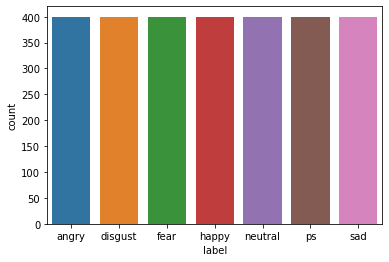

In [110]:
sns.countplot(df['label'])

**WAVEPLOT**

**sad**

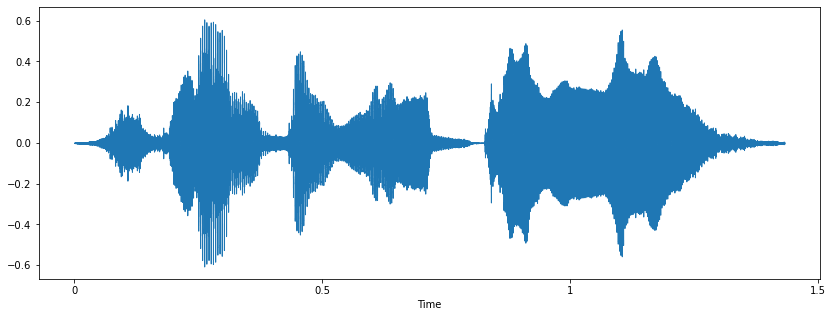

In [42]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][134])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

**neutral**

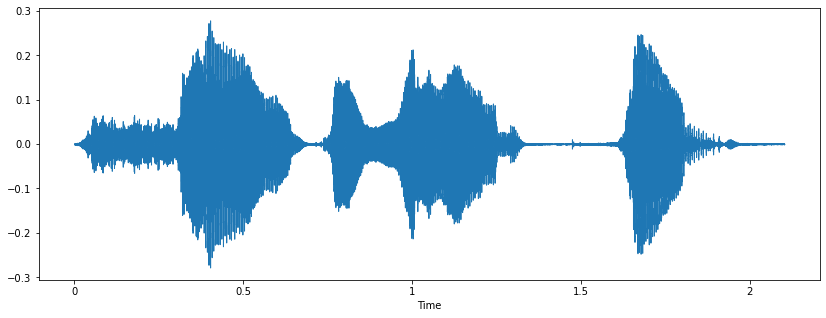

In [43]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][34])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

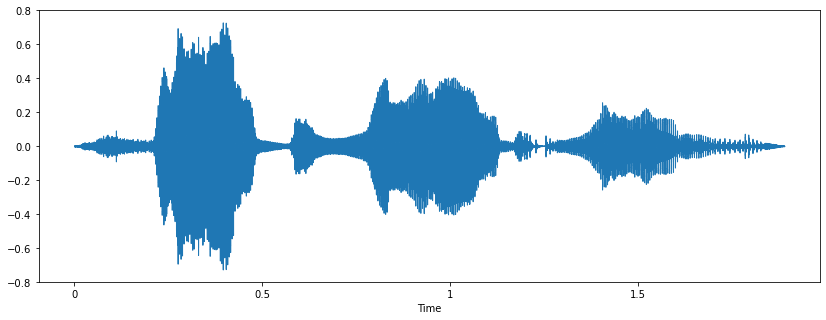

In [44]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])
librosa.display.waveshow(audio_speech,sr=rate)
Audio(audio_speech,rate=rate)

**SPECSHOW**

**ps**

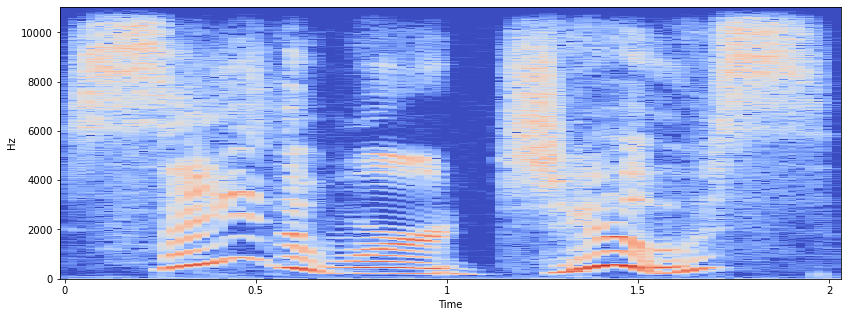

In [45]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][458])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

**neutral**

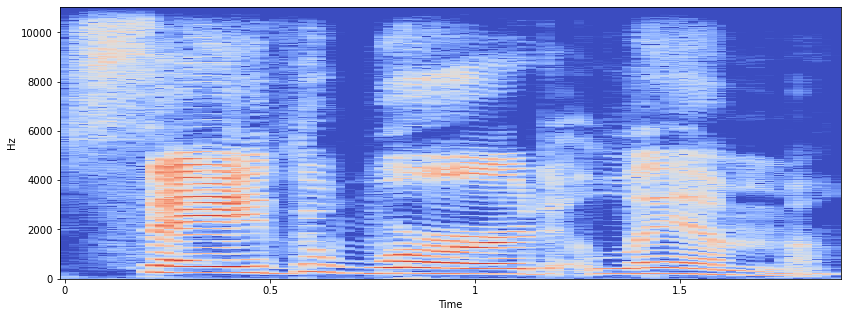

In [46]:
figure = plt.figure(figsize=(14,5))

audio_speech,rate = librosa.load(Main_Wav_Data["WAV"][4])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

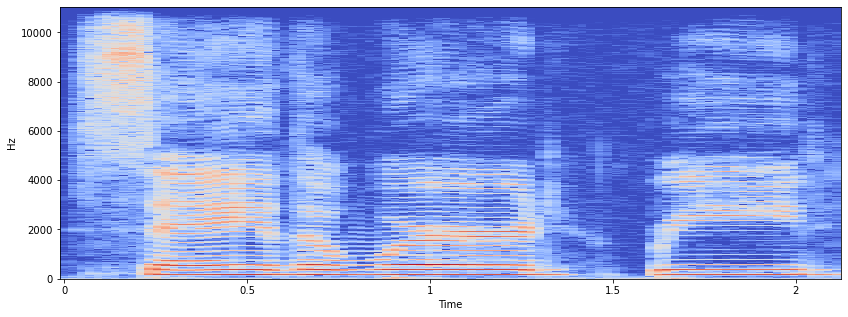

In [47]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stft_audio = librosa.stft(audio_speech)
Db_audio = librosa.amplitude_to_db(abs(stft_audio))
librosa.display.specshow(Db_audio,sr=rate,x_axis="time",y_axis="hz")
Audio(audio_speech,rate=rate)

**NOISE**

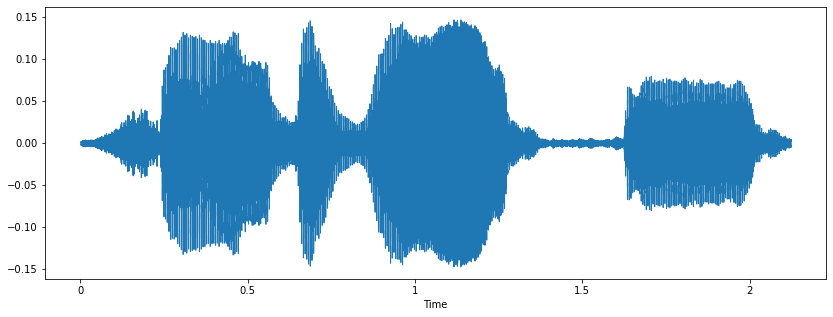

In [49]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

noise_injection = add_noise(audio_speech)

librosa.display.waveshow(noise_injection,sr=sample_rate)
Audio(noise_injection,rate=sample_rate)

**STRETCHING**

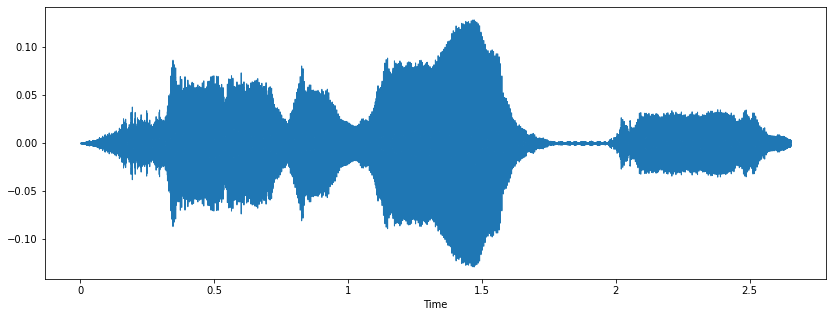

In [51]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

stretching_audio = stretch_process(audio_speech)
librosa.display.waveshow(stretching_audio,sr=sample_rate)
Audio(stretching_audio,rate=sample_rate)

**SHIFTING**

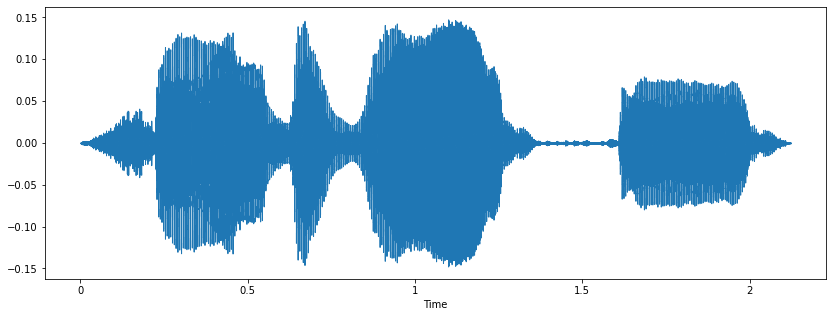

In [53]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

shifting_audio = shift_process(audio_speech)
librosa.display.waveshow(shifting_audio,sr=sample_rate)
Audio(shifting_audio,rate=sample_rate)

**PITCH**

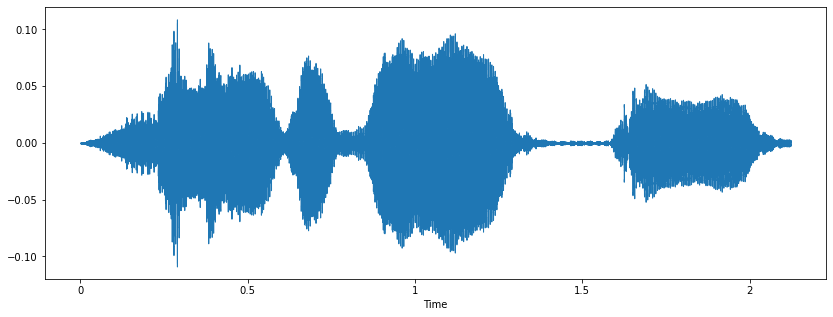

In [54]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000])

pitch_audio = pitch_process(audio_speech,sample_rate)
librosa.display.waveshow(pitch_audio,sr=sample_rate)
Audio(pitch_audio,rate=sample_rate)

**SAME TIMEFRAME PERIOD**

(37992,)


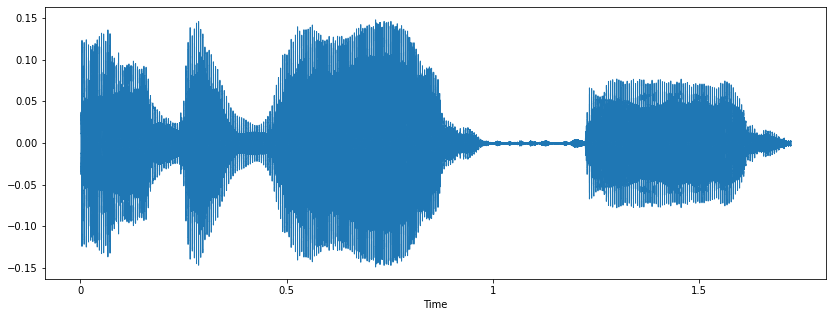

In [55]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][2000],duration=2.5,offset=0.4)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

(29792,)


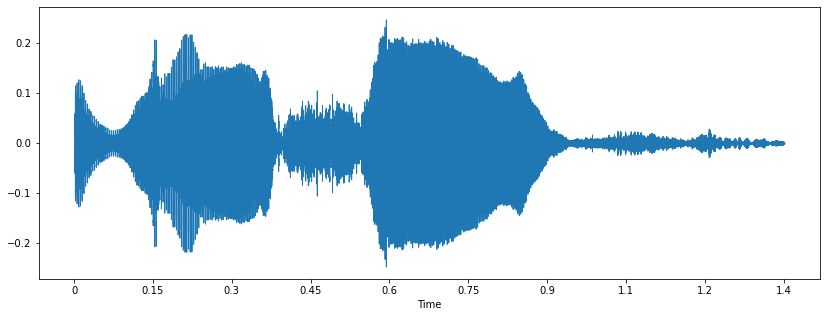

In [56]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][3],duration=2.5,offset=0.6)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

(35324,)


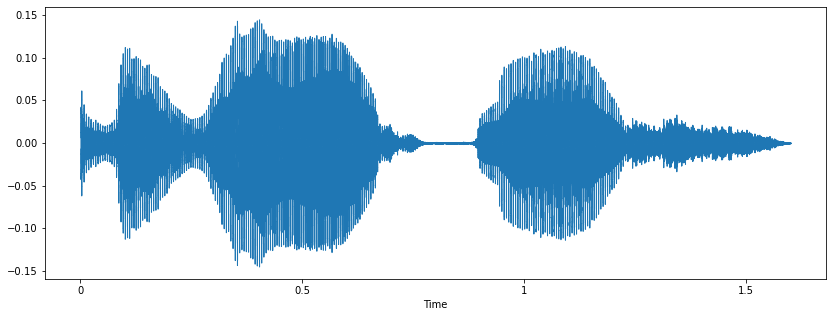

In [57]:
figure = plt.figure(figsize=(14,5))

audio_speech,sample_rate = librosa.load(Main_Wav_Data["WAV"][1398],duration=2.5,offset=0.6)
librosa.display.waveshow(audio_speech,sr=sample_rate)
print(audio_speech.shape)
Audio(audio_speech,rate=sample_rate)

**DATA PROCESS**

**TRANSFORMATION AND EXPORTATION**

In [58]:
x_Train, y_Train = [],[]

for path,emotion in zip(Main_Wav_Data.WAV,Main_Wav_Data.EMOTION):
    
    features = export_process(path)
    
    for element in features:
        x_Train.append(element)
        y_Train.append(emotion)

In [59]:
print(len(x_Train))
print(len(y_Train))
print(len(Main_Wav_Data.WAV))

8400
8400
2800


In [60]:
print(x_Train[0].shape)

(162,)


In [61]:
print(y_Train[0:5])

['OAF_Sad', 'OAF_Sad', 'OAF_Sad', 'OAF_Fear', 'OAF_Fear']


In [62]:
New_Features_Wav = pd.DataFrame(x_Train)
New_Features_Wav["EMOTIONS"] = y_Train

New_Features_Wav.to_csv("New_Wav_Set.csv",index=False)

In [63]:
New_Features_Wav.head(-1)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,EMOTIONS
0,0.068921,0.304584,0.345481,0.283421,0.300511,0.377297,0.539359,0.616241,0.435435,0.406405,...,0.000016,0.000006,0.000004,9.523700e-06,1.129566e-05,1.768412e-05,2.480027e-05,6.858461e-06,4.773473e-07,OAF_Sad
1,0.068964,0.315870,0.346884,0.283664,0.313345,0.392084,0.565398,0.603718,0.417543,0.424082,...,0.000016,0.000007,0.000005,9.998433e-06,1.190624e-05,1.821973e-05,2.516763e-05,7.234357e-06,9.289839e-07,OAF_Sad
2,0.073833,0.326260,0.376099,0.449570,0.297130,0.330851,0.423155,0.583698,0.595476,0.424634,...,0.000003,0.000003,0.000003,9.968636e-07,1.910047e-06,2.898758e-06,2.136873e-06,1.519895e-06,1.689431e-07,OAF_Sad
3,0.042190,0.309757,0.581448,0.769293,0.558463,0.414061,0.303260,0.268191,0.219868,0.331852,...,0.000034,0.000016,0.000025,3.969967e-05,5.912040e-05,3.057986e-05,2.470119e-05,4.860519e-06,2.691293e-07,OAF_Fear
4,0.077676,0.459372,0.779226,0.697599,0.511614,0.405350,0.317339,0.263154,0.308248,0.455057,...,0.000048,0.000029,0.000039,5.428853e-05,7.514791e-05,4.610530e-05,3.808079e-05,1.664943e-05,1.265513e-05,OAF_Fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,0.031425,0.239517,0.228687,0.240703,0.259904,0.315629,0.377425,0.399127,0.409855,0.435599,...,0.000011,0.000003,0.000002,1.334252e-06,1.194049e-06,1.655852e-06,1.038540e-06,2.294767e-07,2.817301e-08,OAF_Pleasant_surprise
8395,0.037926,0.285650,0.284220,0.297529,0.321363,0.385196,0.415450,0.424296,0.423322,0.470735,...,0.000030,0.000021,0.000021,1.860436e-05,1.880562e-05,2.016674e-05,1.913543e-05,1.771882e-05,1.712976e-05,OAF_Pleasant_surprise
8396,0.037392,0.298320,0.284401,0.266974,0.297791,0.306949,0.366578,0.392012,0.402700,0.414926,...,0.000002,0.000003,0.000001,7.898718e-07,5.896568e-07,2.918959e-07,2.835673e-07,1.482364e-07,1.450309e-08,OAF_Pleasant_surprise
8397,0.089094,0.498567,0.457970,0.466907,0.453801,0.411515,0.432442,0.433884,0.552058,0.642911,...,0.003604,0.002387,0.001384,1.428457e-03,1.326454e-03,5.809864e-04,2.928400e-04,1.204426e-04,1.171679e-05,YAF_pleasant_surprised


In [64]:
print(New_Features_Wav["EMOTIONS"].value_counts())

YAF_angry                 600
OAF_disgust               600
YAF_pleasant_surprised    600
OAF_Sad                   600
OAF_Fear                  600
YAF_neutral               600
YAF_disgust               600
OAF_Pleasant_surprise     600
YAF_fear                  600
OAF_neutral               600
OAF_angry                 600
YAF_sad                   600
OAF_happy                 600
YAF_happy                 600
Name: EMOTIONS, dtype: int64


**SPLITTING**

In [65]:
encoder_label = OneHotEncoder()  

In [66]:
scaler_data = StandardScaler()  #standardising the dataset

In [67]:
X = New_Features_Wav.iloc[:,:-1].values
Y = New_Features_Wav["EMOTIONS"].values

In [68]:
print(X.shape)
print(Y.shape)

(8400, 162)
(8400,)


In [69]:
Y = encoder_label.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [70]:
print(Y.shape)

(8400, 14)


In [71]:
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,train_size=0.9,random_state=42,shuffle=True)

In [72]:
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(7560, 162)
(7560, 14)
(840, 162)
(840, 14)


In [75]:
xTrain = scaler_data.fit_transform(xTrain)
xTest = scaler_data.transform(xTest)

In [76]:
print(xTrain.shape)
print(xTest.shape)

(7560, 162)
(840, 162)


In [77]:
xTrain = np.expand_dims(xTrain,axis=2)
xTest = np.expand_dims(xTest,axis=2)

In [78]:
print(xTrain.shape)
print(xTest.shape)

(7560, 162, 1)
(840, 162, 1)


**MODEL STRUCTURE**

In [111]:
Model=Sequential()
Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(xTrain.shape[1], 1)))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
Model.add(Dropout(0.2))

Model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
Model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

Model.add(Flatten())
Model.add(Dense(units=32, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=14, activation='softmax'))

In [80]:
Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [81]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [82]:
Conv1D_Model = Model.fit(xTrain, yTrain, batch_size=64, epochs=50, validation_data=(xTest, yTest), callbacks=[early_stop])

Epoch 1/50
119/119 [==============================] - 40s 310ms/step - loss: 1.8770 - accuracy: 0.3840 - val_loss: 0.8166 - val_accuracy: 0.7548
Epoch 2/50
119/119 [==============================] - 36s 306ms/step - loss: 0.8649 - accuracy: 0.7131 - val_loss: 0.5133 - val_accuracy: 0.8429
Epoch 3/50
119/119 [==============================] - 36s 306ms/step - loss: 0.5488 - accuracy: 0.8205 - val_loss: 0.2276 - val_accuracy: 0.9333
Epoch 4/50
119/119 [==============================] - 36s 307ms/step - loss: 0.3847 - accuracy: 0.8758 - val_loss: 0.1468 - val_accuracy: 0.9524
Epoch 5/50
119/119 [==============================] - 36s 305ms/step - loss: 0.2725 - accuracy: 0.9075 - val_loss: 0.1295 - val_accuracy: 0.9583
Epoch 6/50
119/119 [==============================] - 36s 304ms/step - loss: 0.2607 - accuracy: 0.9185 - val_loss: 0.1593 - val_accuracy: 0.9500
Epoch 7/50
119/119 [==============================] - 37s 309ms/step - loss: 0.2142 - accuracy: 0.9329 - val_loss: 0.1351 - val_ac

<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

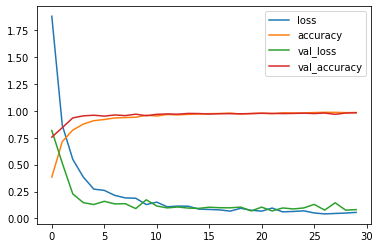

In [83]:
Grap_Data = pd.DataFrame(Conv1D_Model.history)
figure = plt.figure(figsize=(10,10))
Grap_Data.plot()

No handles with labels found to put in legend.


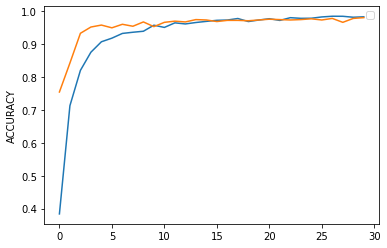

In [84]:
plt.plot(Conv1D_Model.history["accuracy"])
plt.plot(Conv1D_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No handles with labels found to put in legend.


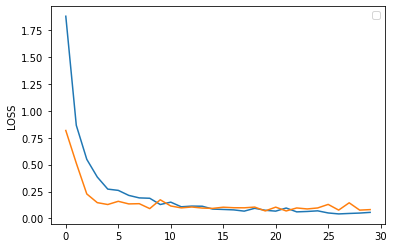

In [85]:
plt.plot(Conv1D_Model.history["loss"])
plt.plot(Conv1D_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

**PREDICTION**

In [86]:
Model_Results = Model.evaluate(xTest,yTest)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

27/27 [==============================] - 1s 34ms/step - loss: 0.0822 - accuracy: 0.9810
LOSS:  0.0822
ACCURACY:  0.9810


In [87]:
prediction_test = Model.predict(xTest)
y_prediction = encoder_label.inverse_transform(prediction_test)

yTest = encoder_label.inverse_transform(yTest)

27/27 [==============================] - 1s 33ms/step


In [88]:
print(prediction_test[0:10])

[[5.27986765e-10 2.17238200e-10 1.66317511e-14 1.00000000e+00
  1.36283776e-10 2.27338232e-10 3.28265005e-17 1.38624190e-09
  1.68045970e-12 7.68467104e-13 1.36385181e-10 1.20286689e-11
  4.43754761e-13 2.46067422e-17]
 [1.00000000e+00 1.17745728e-14 3.28018815e-22 1.11567968e-13
  5.74160129e-22 4.15627626e-19 9.33108832e-17 3.23674820e-28
  1.35145559e-29 1.41256191e-16 3.53494562e-25 5.60352132e-17
  1.12761523e-24 3.81830211e-22]
 [9.19517854e-19 1.19714798e-17 5.39599625e-38 2.52189512e-15
  1.70299554e-26 9.75143012e-27 1.20180147e-32 9.03131833e-16
  2.54598262e-23 2.12464757e-13 1.00000000e+00 1.20831061e-17
  1.46828677e-26 4.95891721e-25]
 [1.38906994e-11 8.80310113e-19 3.87294168e-17 9.55579716e-24
  8.13061632e-18 8.56173913e-25 1.00000000e+00 4.37811884e-31
  1.94027970e-34 4.90623802e-15 2.50089607e-22 3.76595586e-12
  2.07677700e-20 4.36061680e-24]
 [1.00000000e+00 2.84533985e-12 7.59211380e-17 3.09883230e-11
  2.56035746e-16 5.62083949e-14 5.98247046e-15 1.21965745e-23


In [89]:
print(y_prediction[0:10])

[['OAF_angry']
 ['OAF_Fear']
 ['YAF_happy']
 ['OAF_neutral']
 ['OAF_Fear']
 ['YAF_sad']
 ['OAF_Sad']
 ['OAF_happy']
 ['YAF_happy']
 ['OAF_disgust']]


In [90]:
print(yTest[0:10])

[['OAF_angry']
 ['OAF_Fear']
 ['YAF_happy']
 ['OAF_neutral']
 ['OAF_Fear']
 ['YAF_sad']
 ['OAF_Sad']
 ['OAF_happy']
 ['YAF_happy']
 ['OAF_disgust']]


**CONFUSION MATRIX**

In [91]:
conf_matrix = confusion_matrix(yTest, y_prediction)

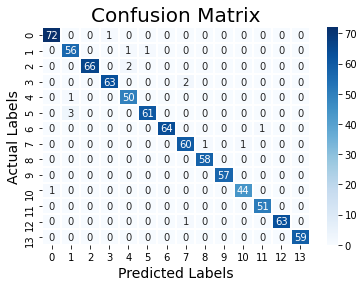

In [92]:
sns.heatmap(conf_matrix, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')

plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [93]:
print(classification_report(yTest, y_prediction))

                        precision    recall  f1-score   support

              OAF_Fear       0.99      0.99      0.99        73
 OAF_Pleasant_surprise       0.93      0.97      0.95        58
               OAF_Sad       1.00      0.97      0.99        68
             OAF_angry       0.98      0.97      0.98        65
           OAF_disgust       0.94      0.98      0.96        51
             OAF_happy       0.98      0.95      0.97        64
           OAF_neutral       1.00      0.98      0.99        65
             YAF_angry       0.95      0.97      0.96        62
           YAF_disgust       0.98      1.00      0.99        58
              YAF_fear       1.00      1.00      1.00        57
             YAF_happy       0.98      0.98      0.98        45
           YAF_neutral       0.98      1.00      0.99        51
YAF_pleasant_surprised       1.00      0.98      0.99        64
               YAF_sad       1.00      1.00      1.00        59

              accuracy                

In [94]:
print(accuracy_score(yTest, y_prediction))

0.9809523809523809
